In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn.functional import softmax
# from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.transforms.functional import InterpolationMode

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix

import os
# import sys

In [2]:
# Use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print(f"GPU {torch.cuda.get_device_name(0)} is available")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead")

No GPU available, using CPU instead


In [3]:
# Load the datasets
transforms = T.Compose([
    T.Resize(256, interpolation=InterpolationMode.BILINEAR),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

path = "D:/projects/healthcare/rscbjbr9sj-3/CellData/OCT/data_binarized_class"
test_data = ImageFolder(os.path.join(path, "test"), transform=transforms)

In [4]:
# Download pre-trained RESNET-18 model
densenet121 = torchvision.models.densenet121()
densenet121

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [5]:
densenet121.classifier = nn.Linear(1024, 2)

In [6]:
densenet121.load_state_dict(torch.load('models/densenet121-oct-5metrics-v1.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [7]:
print(densenet121)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [8]:
densenet121.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [9]:
test_data.class_to_idx

{'ABNORMAL': 0, 'NORMAL': 1}

In [10]:
image, target = test_data[12]

Label: ABNORMAL


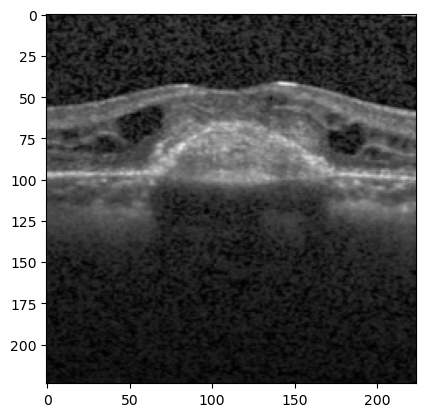

In [11]:
# Visualize a sample image
if target == 0:
    print(f"Label: ABNORMAL")
elif target == 1:
    print(f"Label: NORMAL")

# Define mean and std values used in normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Convert the tensor to a NumPy array
normalized_array = image.numpy()

# Transpose the array to have the channel dimension as the last axis
original_image = np.transpose(normalized_array, (1, 2, 0))

# Reverse normalization
original_image = (original_image * np.array(std)) + np.array(mean)

# Ensure pixel values are in the valid range [0, 1]
original_image = np.clip(original_image, 0, 1)

# Display the original image using Matplotlib
plt.imshow(original_image)
plt.show()

In [12]:
image = image.unsqueeze(dim=0)
image.shape

torch.Size([1, 3, 224, 224])

In [13]:
def predict(image):
    raw = densenet121(image)
    y_hat = softmax(raw, dim=1)
    pred = torch.argmax(y_hat)
    if pred == 0:
        print(f"ABNORMAL {round(float(y_hat.detach()[0][0])*100, 2)}%")
    elif pred == 1:
        print(f"NORMAL {round(float(y_hat.detach()[0][1])*100, 2)}%")
    return raw, y_hat

In [14]:
raw, yhat = predict(image)

ABNORMAL 100.0%


In [15]:
raw

tensor([[ 5.5819, -5.6550]], grad_fn=<AddmmBackward0>)

In [16]:
yhat

tensor([[9.9999e-01, 1.3179e-05]], grad_fn=<SoftmaxBackward0>)